# Dependents

In [1]:
%pylab inline

import os
from glob import glob
import time
from MP import progress_bar, lib
from MP.lib import mpl_lib
import matplotlib as mpl
import cPickle as pickle
from MP.mat import mech
import scipy as sp
from scipy import integrate
from scipy import optimize
cf=optimize.curve_fit

intp=np.interp#  ## (x,xp,fp,left=None, right=None)

cumtrapz=sp.integrate.cumtrapz

fc=mech.FlowCurve
uet=progress_bar.update_elapsed_time
GS=mpl.gridspec.GridSpec

Populating the interactive namespace from numpy and matplotlib


In [2]:
path_home = os.getcwd()
os.chdir('/Users/yj/repo/vpsc/vpsc-dev-fld')
import fld_pp, fld
from fld_pp import draw_guide
os.chdir(path_home)

### Uniaxial experimental data

In [3]:
def re(a,e,b):
    return a*e+b

## use below to estimate 'exx' from 'eyy' by 
def utd_exx(eyy):
    eyy=np.array(eyy)
    r=eyy * popt[0]+popt[1]
    
    return -eyy/(r+1.)*r
def urd_eyy(exx):
    exx = np.array(exx)
    r = exx * popt_r[0]+popt_r[1]
    return -exx/(r+1.)*r

### Loaded pickled FC uniaxials

In [54]:
ls FC*

FC_raw_PF        FC_raw_PF_BB     FC_raw_URD       FC_raw_UTD       FC_smoothed_exp


<Container object of 3 artists>

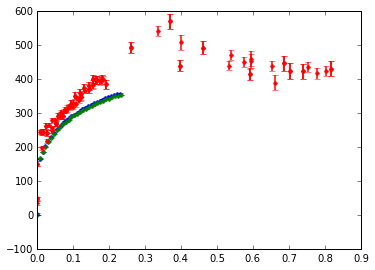

In [66]:
fn='FC_raw_URD'
with open(fn,'rb') as f:
    fc_URD_err=pickle.load(f)
    
fn='FC_raw_UTD'
with open(fn,'rb') as f:
    fc_UTD_err=pickle.load(f)
    
fn='FC_raw_PF_BB'
with open(fn,'rb') as f:
    fc_BB_err=pickle.load(f)
fc_BB_err.sigma_vme=(fc_BB_err.sigma_e[0]+fc_BB_err.sigma_e[1])/2.

nstp=10
errorbar(fc_URD_err.epsilon[0,0][::nstp],fc_URD_err.sigma[0,0][::nstp],marker='.',yerr=fc_URD_err.sigma_xx_e[::nstp],linestyle='None')
errorbar(fc_UTD_err.epsilon[1,1][::nstp],fc_UTD_err.sigma[1,1][::nstp],marker='.',yerr=fc_URD_err.sigma_yy_e[::nstp],linestyle='None')
errorbar(fc_BB_err.epsilon_vm,fc_BB_err.sigma_vm,yerr=fc_BB_err.sigma_vme,marker='.',linestyle='None')

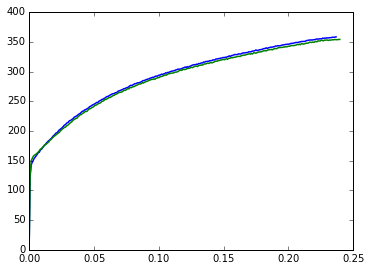

In [67]:
## Pickled data load
fn='IFsteel_fc_urd'
with open(fn,'rb') as f:
    fc_urd=pickle.load(f)

fn='IFsteel_fc_utd'
with open(fn,'rb') as f:
    fc_utd=pickle.load(f)
    
## plot
plot(fc_urd.epsilon[0,0],fc_urd.sigma[0,0])
plot(fc_utd.epsilon[1,1],fc_utd.sigma[1,1])

/Users/yj/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':
/Users/yj/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from IPython.kernel.zmq import kernelapp as app


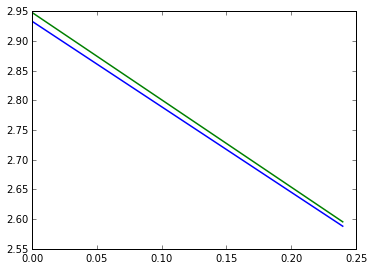

In [68]:
plot(fc_utd.epsilon[1,1],fc_utd.epsilon[0,0]/fc_utd.epsilon[2,2])
plot(fc_UTD_err.epsilon[1,1],fc_UTD_err.epsilon[0,0]/fc_UTD_err.epsilon[2,2])

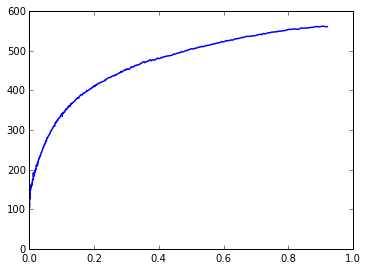

In [69]:
## Load Pickled bulge data
f=open('bulge_exp','rb')
bulge_exp_dat=pickle.load(f)
f.close()

plot(bulge_exp_dat[0],bulge_exp_dat[1])

##### EVPSC predictions

In [70]:
fn_str_str='/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/STR_STR.PSTD'
evpsc_pstd=fc()
evpsc_pstd.get_model(fn_str_str); evpsc_pstd.get_eqv()
fn_str_str='/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/STR_STR.PSRD'
evpsc_psrd=fc()
evpsc_psrd.get_model(fn_str_str); evpsc_psrd.get_eqv()
fn_str_str='/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/BB/STR_STR.BB'
evpsc_bb=fc()
evpsc_bb.get_model(fn_str_str); evpsc_bb.get_eqv()

fn_str_str='/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/UX/STR_STR.URD'
evpsc_urd=fc()
evpsc_urd.get_model(fn_str_str);evpsc_urd.get_eqv()

fn_str_str='/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/UX/STR_STR.UTD'
evpsc_utd=fc()
evpsc_utd.get_model(fn_str_str);evpsc_utd.get_eqv()


#### Load pickled X-ray data

In [71]:
path_PS='/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/'
path_BB='/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/BB/'
fn_rs = glob(path_PS+'/*/*.pck')+glob(path_BB+'/*/*.pck')
fn_rs.sort()

labels=[]
for i in xrange(len(fn_rs)):
    p2, fn = os.path.split(fn_rs[i])
    p0, p1 =  os.path.split(p2)
    print fn_rs[i],
    lab=os.path.split(p0)[-1]
    print lab, fn
    labels.append('%s %i'%(lab,i+1))

print 'The number of pickled files:',len(fn_rs)

/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/BB/20120711/RS.pck BB RS.pck
/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/BB/20120720/RS.pck BB RS.pck
/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/BB/20120723/RS.pck BB RS.pck
/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/BB/20141028/RS.pck BB RS.pck
/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/BB/20141029/RS.pck BB RS.pck
/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120713/RS_20120713.pck PS RS_20120713.pck
/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120717/RS_20120717.pck PS RS_20120717.pck
/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20141112/RS_20141112.pck PS RS_20141112.pck
The number of pickled files: 8


## Combine results of multiple BB path results into a single FC object

37
36
31
12
23
(139, 3, 3) (139,)


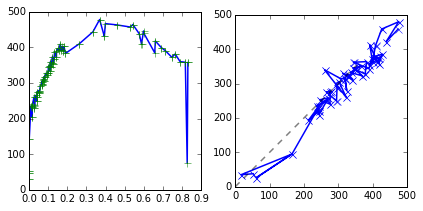

In [72]:
fig=plt.figure(figsize=(7,3))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)


path_BB='/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/BB/'
fn_pck_bb=glob(path_BB+'/*/*.pck')
RS_obj_origin = []
for i in xrange(len(fn_pck_bb)):
    fn=fn_pck_bb[i]
    f=open(fn,'rb')
    RS_obj=pickle.load(f)
    RS_obj_origin.append(RS_obj)

## sorting based on epsilon_vm
E33=[]
S33=[]
E_ref=[]
S_ref=[]
for i in xrange(len(RS_obj_origin)):
    rs = RS_obj_origin[i]
    fc_dic = rs.EXP.flow
    fc_xry = rs.flow
    
    #fc_dic.epsilon_vm ## DIC-strain
    #fc_xry.sigma_vm ## X-ray stress
    
    # plot(fc_dic.epsilon_vm,fc_xry.sigma_vm,'x')

    nstp, dum,dum=fc_dic.epsilon.T.shape
    print nstp
    for j in xrange(nstp):
        E33.append(fc_dic.epsilon.T[j])
        S33.append(fc_xry.sigma.T[j])
        E_ref.append(fc_dic.epsilon_vm[j])
        S_ref.append(fc_xry.sigma_vm[j])

# plot(E_ref,S_ref)

E33=np.array(E33)
S33=np.array(S33)
E_ref=np.array(E_ref)
S_ref=np.array(S_ref)
print E33.shape, E_ref.shape

ind=np.argsort(E_ref)
x = E_ref[ind]
y = S_ref[ind]

ax1.plot(x,y)

E33=E33[ind,:,:].T
S33=S33[ind,:,:].T

fc_BB_comb = fc()

fc_BB_comb.get_33strain(E33)
fc_BB_comb.get_33stress(S33)
fc_BB_comb.get_eqv()
fc_BB_comb.integrate_work()
ax1.plot(fc_BB_comb.epsilon_vm, fc_BB_comb.sigma_vm,'+')

flt=fc_BB_comb.epsilon_vm<0.4

ax2.plot(fc_BB_comb.sigma[0,0][flt],fc_BB_comb.sigma[1,1][flt],'-x')
draw_guide(ax2,r_line=[1],max_r=500)
ax2.set_xlim(0,500)
ax2.set_ylim(0,500)
ax2.set_aspect('equal')

In [73]:
fc_BB_comb.nstp

139

## Smoothing

Compare smoothing based on 1) Power law; 2) Voce (3 params); 3) Modified-Voce (4 params); 4) Swift;
And, obtain the 'average' values in the smoothed data set.

p1, p2 for strain smoothing [ 0.5019227] [ 0.50021976]
[  6.37338382e+02   2.61848108e-01] [  6.05934173e+02   2.63996164e-01]
[ 417.61516767  119.46982431   15.82303655]

/Users/yj/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:47: RuntimeWarning: overflow encountered in power
/Users/yj/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:58: RuntimeWarning: overflow encountered in power


 [ 364.71873406   81.84360697   24.62092345]
[  223.18085829   236.08686004  1148.14319825  1540.50981792] [  219.72524688   203.95526943  1000.50552862   563.23143915]
[  6.29215801e+02  -7.71613743e-05   2.56241355e-01] [  5.94868143e+02  -1.01899647e-04   2.55909071e-01]


/Users/yj/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:58: RuntimeWarning: invalid value encountered in power


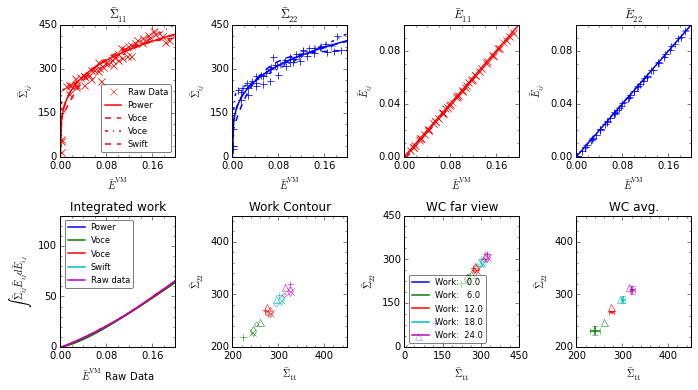

In [74]:
fx=13.5;fy=10
fig=plt.figure(figsize=(fx,fy))
gs=GS(20,30,wspace=0.5,hspace=0.2,bottom=0.2)

ax1=fig.add_subplot(gs[0:5,1:6])
ax2=fig.add_subplot(gs[0:5,8:13])
ax3=fig.add_subplot(gs[0:5,15:20])
ax4=fig.add_subplot(gs[0:5,22:27])
ax5=fig.add_subplot(gs[7:12,1:6])
ax6=fig.add_subplot(gs[7:12,8:13])
ax7=fig.add_subplot(gs[7:12,15:20])
ax8=fig.add_subplot(gs[7:12,22:27])


ax1.plot(fc_BB_comb.epsilon_vm,fc_BB_comb.sigma[0,0],'rx',label='Raw Data')
ax2.plot(fc_BB_comb.epsilon_vm,fc_BB_comb.sigma[1,1],'b+')
ax3.plot(fc_BB_comb.epsilon_vm,fc_BB_comb.epsilon[0,0],'rx')
ax4.plot(fc_BB_comb.epsilon_vm,fc_BB_comb.epsilon[1,1],'b+')

ax1.set_title(r'$\bar{\Sigma}_{11}$')
ax2.set_title(r'$\bar{\Sigma}_{22}$')
ax3.set_title(r'$\bar{E}_{11}$')
ax4.set_title(r'$\bar{E}_{22}$')
ax5.set_title('Integrated work')
ax6.set_title('Work Contour')
ax7.set_title('WC far view')
ax8.set_title('WC avg.')

## fit it to a power law
## prepare a temp folder, in which VPSC is running.
def lin(e,a,b):
    """
    y=a*e+b
    """
    return a*e+b

def lin0(e,a):
    """
    y=a*e
    """
    return a*e

def power(e,a=6.37,n=2.61):
    """ y=ae**n
    """
    # 6.37338382e+02   2.61848108e-01
    return a * e**n
"""
Voce [ 417.61516767  119.46982431   15.82303655] [ 364.71873406   81.84360697   24.62092345]
Voce2 [  223.18085829   236.08686004  1148.14319825  1540.50981792] [  219.72524688   203.95526943  1000.50552862   563.23143915]
Swift [  6.29215801e+02  -7.71613743e-05   2.56241355e-01] [  5.94868143e+02  -1.01899647e-04   2.55909071e-01]
"""
def func_voce(e,s0=417,s1=119,ev_inv=15):
    return s0-(s0-s1)*np.exp(-ev_inv*e)
def func_voce2(e,a=223,b0=236,b1=1148,c=1540):
    return a-b0*np.exp(-c*e)+b1*e
def func_swift(e,c=630,e0=-7.e-5,n=0.256):
    return c*(e+e0)**n
def func_hs(e,s0,s1,ev_inv,n):
    return s0-(s0-s1) * np.exp(-ev_inv*(e**n))


def poly(x,a,b,c):    
    """
    y=ax^2+bx+c
    """
    return a*x**2+b*x+c
# evm_limit=0.5
# eps=np.linspace(0,evm_limit)
# plot(eps,func_swift(eps,200,0.1,0.2));gca().set_ylim(0.,)

max_eps=0.2
ndat=100
    
## Strain smoothing
x=fc_BB_comb.epsilon_vm[flt]
y1=fc_BB_comb.epsilon[0,0][flt]
y2=fc_BB_comb.epsilon[1,1][flt]
p1,dum=cf(lin0,x,y1)
p2,dum=cf(lin0,x,y2)
e=np.linspace(0,max_eps,ndat)
print 'p1, p2 for strain smoothing',p1, p2
e11=lin0(e,*p1)
e22=lin0(e,*p2)
ax3.plot(e,e11,'r')
ax4.plot(e,e22,'b')


## Stress smoothing for stress components
## power law
funcs=[power,func_voce,func_voce2,func_swift]#,func_hs]
labs=['Power','Voce','Voce','Swift']
lines=['-','--','-.','--']
FC_smoothed=[]
for i in xrange(len(funcs)):
    func=funcs[i]
    flt=fc_BB_comb.epsilon_vm<max_eps
    x=fc_BB_comb.epsilon_vm[flt]
    y1=fc_BB_comb.sigma[0,0][flt]
    y2=fc_BB_comb.sigma[1,1][flt]
    popt1,pcov=cf(func,x,y1)
    popt2,pcov=cf(func,x,y2)
    print popt1,popt2
    e=np.linspace(0,max_eps,ndat)
    sig11=func(e,*popt1)
    sig22=func(e,*popt2)
    ax1.plot(e,sig11,'r'+lines[i],label=labs[i])
    ax2.plot(e,sig22,'b'+lines[i])
    
    
    ## make FlowCurve objects for indivial cases.    
    fcs=fc()
    fcs.get_strain(e11,0,0)
    fcs.get_strain(e22,1,1)
    fcs.get_strain(-e11-e22,2,2)
    fcs.get_stress(sig11,0,0)
    fcs.get_stress(sig22,1,1)
    fcs.set_zero_sigma_ij(2,2)
    fcs.set_zero_shear_strain()
    fcs.set_zero_shear_stress()
    fcs.get_eqv()
    fcs.integrate_work()
    
    FC_smoothed.append(fcs)
    

## Compare integrated work evolution w.r.t. epsilon_vm
works=[]
for i in xrange(len(FC_smoothed)):
    _fc_=FC_smoothed[i]
    works.append(max(_fc_.work))
    ax5.plot(e,_fc_.work,label=labs[i])
ax5.plot(fc_BB_comb.epsilon_vm,fc_BB_comb.work,label='Raw data')
ax5.set_xlim(0,max_eps)
ax5.set_ylim(0,130)
#print 'Integrated works through cumulative trapzoidal method'
#print works

## Work contours
ncnt=5
wrk_ref=np.linspace(0,24,ncnt)#[1:]
#ncnt=ncnt-1
m=['x','+','.','d','^'] ## mothods
c=['b','g','r','c','m'] ## work levels

avg=[]
for i in xrange(len(wrk_ref)):
    ## (x,xp,fp,left=None, right=None)
    s1,s2=[],[]
    for j in xrange(len(FC_smoothed)):
        _s11_=intp(wrk_ref[i],FC_smoothed[j].w,FC_smoothed[j].sigma[0,0])
        _s22_=intp(wrk_ref[i],FC_smoothed[j].w,FC_smoothed[j].sigma[1,1])
        #print _s11_,_s22_
        ax6.plot(_s11_,_s22_,m[j],mec=c[i],mfc='None')
        ax7.plot(_s11_,_s22_,m[j],mec=c[i],mfc='None')
        if j==0: ax7.plot(-100,-100,'-',color=c[i],label='Work: %5.1f'%wrk_ref[i])
        s1.append(_s11_);s2.append(_s22_)
    m1=np.mean(s1);sg1=np.std(s1)
    m2=np.mean(s2);sg2=np.std(s2)
    ax8.errorbar(m1,m2,yerr=sg2,xerr=sg1,color=c[i])

    ## raw data
    _s11_=intp(wrk_ref[i],fc_BB_comb.w,fc_BB_comb.sigma[0,0])
    _s22_=intp(wrk_ref[i],fc_BB_comb.w,fc_BB_comb.sigma[1,1])
    ax6.plot(_s11_,_s22_,m[j+1],mec=c[i],mfc='None')
    ax7.plot(_s11_,_s22_,m[j+1],mec=c[i],mfc='None')
    ax8.plot(_s11_,_s22_,m[j+1],mec=c[i],mfc='None')
    
        
ax6.set_xlim(200,450);ax6.set_ylim(200,450)
ax7.set_xlim(0,450);ax7.set_ylim(0,450)
ax8.set_xlim(200,450);ax8.set_ylim(200,450)
    

for ax in fig.axes[:2]:
    ax.set_xlim(0,max_eps)
    ax.set_ylim(0,450)
    ax.set_xlabel(r'$\bar{E}^\mathrm{VM}$')
    ax.set_ylabel(r'$\bar{\Sigma}_{ij}$')
    
for ax in fig.axes[2:4]:
    ax.set_xlim(0,max_eps)
    ax.set_ylim(0,0.10)
    ax.set_xlabel(r'$\bar{E}^\mathrm{VM}$')
    ax.set_ylabel(r'$\bar{E}_{ij}$')

for ax in fig.axes[5:8]:
    ax.set_xlabel(r'$\bar{\Sigma}_{11}$')
    ax.set_ylabel(r'$\bar{\Sigma}_{22}$')

ax1.legend(loc='best',framealpha=0.5,fancybox=True)
ax5.legend(loc='best',framealpha=0.5,fancybox=True)
ax7.legend(loc='lower left',framealpha=0.5,fancybox=True)

for ax in fig.axes:    
    ax.xaxis.set_major_locator(MaxNLocator(nbins=3))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
    ax.minorticks_on()
    
ax5.set_xlabel(r'$\bar{E}^\mathrm{VM}$ Raw Data')
ax5.set_ylabel(r'$\int\ \bar{\Sigma}_{ij} \bar{E}_{ij} d \bar{E}_{ij}$')

fig.savefig('BB_wk.pdf',bbox_inches='tight')

### Employ the above to a simple func

In [75]:
"""

Power [  6.37338382e+02   2.61848108e-01] 
Voce [ 417.61516767  119.46982431   15.82303655]
Voce2 [  223.18085829   236.08686004  1148.14319825  1540.50981792]
Swift [  6.29215801e+02  -7.71613743e-05   2.56241355e-01]
"""
p0_p= [254.31205624, 254.31206226]#,250,250] # [  6.37338382e+02,   2.61848108e-01] 
p0_v = [ 417.61516767,    119.46982431,  15.82303655]
p0_v2= [101.21902986,   14.10599324,  402.88256593,  121.28988235]#[ 80,80,80,80]
###      102.92319281  21421.18230848    377.25787851    786.43853862
p0_s= [  6.29215801e+02,  -7.71613743e-05,  2.56241355e-01]
p0s=[p0_p,p0_v,p0_v2,p0_s]

def smooth_fc(raw_fc,
              neps=100,
              max_evm=0.2,
              ncnt=5,
              max_wrk=70,
              iplot=False,x0=0,y10=0,y20=0):
    """
    
    
    Arguments
    ---------
    raw_fc
    neps
    max_evm
    ncnt
    max_wrk
    iplot
    """
    
    fx=17;fy=10
    fig=plt.figure(figsize=(fx,fy))
    gs=GS(25,35,wspace=1,hspace=0.2,bottom=0.2)
    ax1=fig.add_subplot(gs[0:5,1:6])
    ax2=fig.add_subplot(gs[0:5,8:13])
    ax3=fig.add_subplot(gs[0:5,15:20])
    ax4=fig.add_subplot(gs[0:5,22:27])
    ax5=fig.add_subplot(gs[9:14,1:6])
    ax6=fig.add_subplot(gs[9:14,8:13])
    ax7=fig.add_subplot(gs[9:14,15:20])
    ax8=fig.add_subplot(gs[9:14,22:27])
    ax9=fig.add_subplot(gs[18:23,1:6])
    
    ax10=fig.add_subplot(gs[18:23,8:13])

    evm = raw_fc.epsilon_vm
    flt1=evm<max_evm
    flt2=0<raw_fc.sigma[0,0]
    flt3=0<raw_fc.sigma[1,1]
    # flt = (flt and flt1) and flt2
    flt=[]
    for i in range(len(flt1)):
        flt.append(flt1[i] and flt2[i] and flt3[i])
        
    flt = np.array(flt)
    evm_ref = evm[flt]
    
    s11=raw_fc.sigma[0,0][flt]
    s22=raw_fc.sigma[1,1][flt]
    e11=raw_fc.epsilon[0,0][flt]
    e22=raw_fc.epsilon[1,1][flt]
    e33=-e11-e22
    
    ax1.plot(evm_ref,s11,'rx',label='Raw Data')
    ax2.plot(evm_ref,s22,'b+')
    ax3.plot(evm_ref,e11,'rx')
    ax4.plot(evm_ref,e22,'b+')
    
    #ax1.set_title(r'$\bar{\Sigma}_{11}$')
    #ax2.set_title(r'$\bar{\Sigma}_{22}$')
    ax3.set_title(r'$\bar{E}_{11}$')
    ax4.set_title(r'$\bar{E}_{22}$')
    ax5.set_title('Integrated work')
    ax6.set_title('Fitted flow curve')
    ax7.set_title('WC far view')
    ax8.set_title('WC avg.')
    
    ## Strain smoothing

    p1,dum=cf(lin0,evm_ref,e11)
    p2,dum=cf(lin0,evm_ref,e22)
    
    evm=np.linspace(0.000,max_evm,neps)
    e11 = lin0(evm,*p1)
    e22 = lin0(evm,*p2)
    e33=-e11-e22
    
    ax3.plot(evm,e11,'r');ax4.plot(evm,e22,'b')
    
    ## stress smoothing
    # funcs=[power,func_voce,func_voce2,func_swift]
    # labs=['Power','Voce','Voce2','Swift']
    funcs=[func_voce2]#[power,func_voce2]
    labs=['Voce fit']#['Power','Voce2']
    FC_smoothed=[]
    for i in xrange(len(funcs)):
        func=funcs[i]
        try:
            #print s11[0], s22[0]
            x=[x0];y1=[y10];y2=[y20] ## fool func
            for j in xrange(len(evm_ref)):
                x.append(evm_ref[j])
                y1.append(s11[j])
                y2.append(s22[j])
            
            #ax1.plot(x,y1,'r.')
            #ax2.plot(x,y2,'b.')
            print 'len(evm_ref):',len(evm_ref)
            
            #cf=optimize.curve_fit
            popt1,dum=cf(func,x,y1,p0_v2) #p0s[i])
            popt2,dum=cf(func,x,y2,p0_v2) #p0s[i])
        except: 
            print 'Failed fitting using', funcs[i]
        else:
            print 'labs, popt1, popt2'
            print labs[i], popt1, popt2
            _s11_=func(evm,*popt1)
            _s22_=func(evm,*popt2)
        
            ax1.plot(evm,_s11_,'r'+lines[i],label=labs[i])
            ax2.plot(evm,_s22_,'b'+lines[i])
        
            _fc_ = fc()
            _fc_.get_strain(e11,0,0);    _fc_.get_strain(e22,1,1);    _fc_.get_strain(e33,2,2)
            _fc_.get_stress(_s11_,0,0);  _fc_.get_stress(_s22_,1,1);  _fc_.set_zero_sigma_ij(2,2)
            _fc_.set_zero_shear_strain();_fc_.set_zero_shear_stress();_fc_.get_eqv();_fc_.integrate_work()
            FC_smoothed.append(_fc_)

    ## calc works
    wrk_ref=np.linspace(0,mxwk,ncnt)# wrk_ref=np.linspace(0.1,max_wrk,ncnt)#[1:]
    dat=[]
    dat_e=[]
    for j in xrange(len(FC_smoothed)):
        ax5.plot(FC_smoothed[j].epsilon_vm,FC_smoothed[j].work,label=labs[j])
    
    for i in xrange(len(wrk_ref)):
        s1,s2=[],[]
        for j in xrange(len(FC_smoothed)):
            _fc_=FC_smoothed[j]
            
            xp=_fc_.work
            fp1=_fc_.sigma[0,0]
            fp2=_fc_.sigma[1,1]
            
            _s11_=intp(wrk_ref[i],xp,fp1)
            _s22_=intp(wrk_ref[i],xp,fp2)
            
            if i==0:
                ax6.plot(xp,fp1,'r')
                ax6.plot(xp,fp2,'b')
            
            ax9.plot(_s11_,_s22_,m[j],mec=c[i],mfc='None')                
            ax7.plot(_s11_,_s22_,m[j],mec=c[i],mfc='None')
            
            s1.append(_s11_)
            s2.append(_s22_)
        m1=np.mean(s1);sg1=np.std(s1)
        m2=np.mean(s2);sg2=np.std(s2)
        ax8.errorbar(m1,m2,yerr=sg2,xerr=sg1,color=c[i])
        ax9.errorbar(m1,m2,yerr=sg2,xerr=sg1,color=c[i])
        ax8.plot(_s11_,_s22_,m[j+1],mec=c[i],mfc='None')
        dat.append([m1,m2])
        dat_e.append([sg1,sg2])
        

    
    for ax in fig.axes[:2]:
        #ax.set_xlim(0,max_eps)
        ax.set_ylim(0,450)
        ax.set_xlabel(r'$\mathrm{\bar{E}^\mathrm{VM}}$')
    ax1.set_ylabel(r'$\mathrm{\bar{\Sigma}_{11}}$ [MPa]')
    ax2.set_ylabel(r'$\mathrm{\bar{\Sigma}_{22}}$ [MPa]')
    
    for ax in fig.axes[2:4]:
        #ax.set_xlim(0,max_eps)
        #ax.set_ylim(0,0.10)
        ax.set_xlabel(r'$\bar{E}^\mathrm{VM}$')
        ax.set_ylabel(r'$\bar{E}_{ij}$')        

    ax5.set_xlabel(r'$\mathrm{\bar{E}^\mathrm{VM}}$')
    ax5.set_ylabel(r'$\int\ \bar{\Sigma}_{ij} \bar{E}_{ij} d\bar{E}_{ij}$ [MPa]')
    ax6.set_xlabel(r'$\int\ \bar{\Sigma}_{ij} \bar{E}_{ij} d\bar{E}_{ij}$ [MPa]')
    ax6.set_ylabel(r'$\bar{\Sigma}_{ij}$ [MPa]')
        
    for ax in fig.axes[6:9]:
        ax.set_xlabel(r'$\bar{E}^\mathrm{VM}$')
        ax.set_ylabel(r'$\bar{\Sigma}_{ij}$ [MPa]')
        
    for ax in fig.axes:    
        ax.xaxis.set_major_locator(MaxNLocator(nbins=3))
        ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
        ax.minorticks_on()
        
    ax1.legend(loc='best',framealpha=0.5,fancybox=True)
    ax5.legend(loc='best',framealpha=0.5,fancybox=True)
    ax7.legend(loc='lower left',framealpha=0.5,fancybox=True)

    ax1.set_ylim(0.,450);
    ax2.set_xlim(0.,);ax2.set_ylim(0.,450)

    return FC_smoothed, np.array(dat).T, np.array(dat_e).T, fig

#FC_smoothed,dat, dat_e = smooth_fc(raw_fc=fc_BB_comb,neps=100,max_evm=0.2,ncnt=5,max_wrk=70,iplot=True)
#plot(dat[0],dat[1],'-x')
#FC_smoothed,dat, dat_e,fig = smooth_fc(raw_fc=fc_pstd,neps=100,max_evm=0.10,ncnt=5,max_wrk=70,iplot=True,
#                                      x0=0,y10=90,y20=180)
#FC_smoothed,dat, dat_e,fig = smooth_fc(raw_fc=fc_psrd,neps=100,max_evm=0.10,ncnt=5,max_wrk=70,iplot=True)
#FC_smoothed,dat, dat_e,fig = smooth_fc(raw_fc=fc_bb,neps=100,max_evm=0.10,ncnt=5,max_wrk=70,iplot=True)

## Collective view on the data set

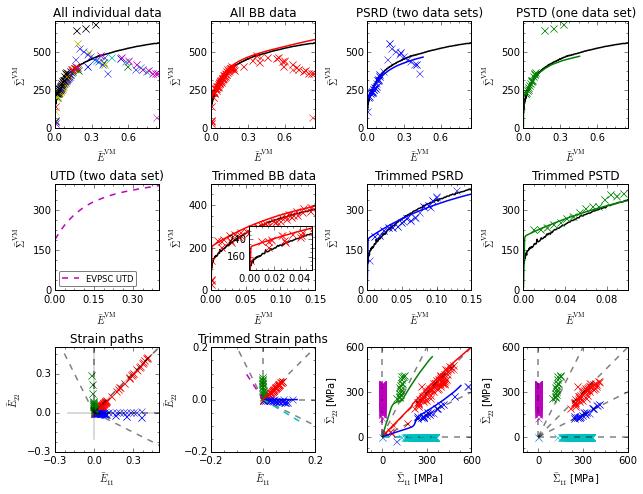

In [76]:
fx=13.5;fy=12
fig=plt.figure(figsize=(fx,fy))
gs=GS(60,5,wspace=0.5,hspace=0.2,bottom=0.2)
ax1=fig.add_subplot(gs[5:15,0])
ax2=fig.add_subplot(gs[5:15,1])
ax3=fig.add_subplot(gs[5:15,2])
ax4=fig.add_subplot(gs[5:15,3])


ax5=fig.add_subplot(gs[20:30,0])
ax6=fig.add_subplot(gs[20:30,1])
ax7=fig.add_subplot(gs[20:30,2])
ax8=fig.add_subplot(gs[20:30,3])

ax9 =fig.add_subplot(gs[35:45,0])
ax10=fig.add_subplot(gs[35:45,1])
ax11=fig.add_subplot(gs[35:45,2])
ax12=fig.add_subplot(gs[35:45,3])


## inserted subplot for BB
ax_bb=fig.add_axes((0.40,0.6,0.065,0.05),axisbg='white')



## bulge test data
E,S = bulge_exp_dat
ax1.plot(E,S,'-k');ax2.plot(E,S,'-k')
ax3.plot(E,S,'-k');ax4.plot(E,S,'-k')
#ax5.plot(E,S,'-k');
ax6.plot(E,S,'-k')
ax7.plot(E,S,'-k');ax8.plot(E,S,'-k')
ax_bb.plot(E,S,'-k')


ax5.plot(evpsc_utd.epsilon_vm, evpsc_utd.sigma_vm,'m--',label='EVPSC UTD')
ax5.legend(loc='best',numpoints=1,ncol=1,framealpha=0.5,fancybox=True)

datS=np.loadtxt('/Users/yj/Documents/ExpDat/IFSteel/uni/avgstr_090.txt').T
ax11.plot(np.zeros(len(datS[0])),datS[1],'x',mec='m',color='m',mfc='None')
ax12.plot(np.zeros(len(datS[0])),datS[1],'x',mec='m',color='m',mfc='None')


## uniaxial RD
ax11.plot(datS[1],np.zeros(len(datS[1])),'x',mec='c',color='c',mfc='None')
ax12.plot(datS[1],np.zeros(len(datS[1])),'x',mec='c',color='c',mfc='None')

c=['r','r','r','r','r','g','b','m']


## data trim
mx_eps=[0.15,0.15,0.10]
mx_sig=[500,400,400]


rs_cnt=[]
for i in xrange(len(fn_rs)):
    date = os.path.split(fn_rs[i])[0].split(os.sep)[-1]
    label = date
    #label = 'Marciniak/X-ray/DIC #%1i'%(i+1)
    #label = 'X-ray #%1i'%(i+1)
    label=os.path.split(fn_rs[i])[-1]
    #ax1.plot([-1],[-100],label=label,mfc='None',mec='k')
    # print date
    f=open(fn_rs[i],'rb')
    myrs=pickle.load(f)
    myrs.fn_orig=fn_rs[i]
    
    ax1.plot(myrs.EXP.flow.epsilon_vm, myrs.flow.sigma_vm,'x')#,color=c[i])
    if i<5: ax2.plot(myrs.EXP.flow.epsilon_vm, myrs.flow.sigma_vm,'rx')
    if i==5 or i==7: ax3.plot(myrs.EXP.flow.epsilon_vm, myrs.flow.sigma_vm,'bx')
    if i==6: ax4.plot(myrs.EXP.flow.epsilon_vm, myrs.flow.sigma_vm,'gx')
        
    if i<5: 
        ax6.plot(myrs.EXP.flow.epsilon_vm, myrs.flow.sigma_vm,'rx')
        ax_bb.plot(myrs.EXP.flow.epsilon_vm,myrs.flow.sigma_vm,'rx')
    if i==5 or i==7: ax7.plot(myrs.EXP.flow.epsilon_vm, myrs.flow.sigma_vm,'bx')
    if i==6: ax8.plot(myrs.EXP.flow.epsilon_vm, myrs.flow.sigma_vm,'gx')
        
    x=myrs.EXP.flow.epsilon[0,0]
    y=myrs.EXP.flow.epsilon[1,1]
    if i<5:          
        ax9.plot(x,y,'rx')
        flt=myrs.EXP.flow.epsilon_vm<mx_eps[0]
        ax10.plot(x[flt],y[flt],'rx')
    if i==5 or i==7: 
        ax9.plot(x,y,'bx')
        flt=myrs.EXP.flow.epsilon_vm<mx_eps[1]
        ax10.plot(x[flt],y[flt],'bx')
    if i==6:         
        ax9.plot(x,y,'gx')  
        flt=myrs.EXP.flow.epsilon_vm<mx_eps[2]
        ax10.plot(x[flt],y[flt],'gx') 
        
    x=myrs.flow.sigma[0,0]
    y=myrs.flow.sigma[1,1]


    if i<5:          
        ax11.plot(x,y,'rx')
        flt=myrs.EXP.flow.epsilon_vm<mx_eps[0]
        flt_el = x[flt]>200. ## Remove elastic portion
        ax12.plot(x[flt][flt_el],y[flt][flt_el],'rx')
    if i==5:# or i==7: 
        ax11.plot(x,y,'bx')
        flt=myrs.EXP.flow.epsilon_vm<mx_eps[1]
        flt_el=x[flt]>150.
        ax12.plot(x[flt][flt_el],y[flt][flt_el],'bx')
    if i==6:         
        ax11.plot(x,y,'gx')  
        flt=myrs.EXP.flow.epsilon_vm<mx_eps[2]
        ax12.plot(x[flt],y[flt],'gx') 

    rs_cnt.append(myrs)

for ax in fig.axes[:8]:
    ax.set_xlabel(r'$\bar{E}^\mathrm{VM}$')
    ax.set_ylabel(r'$\bar{\Sigma}^\mathrm{VM}$')

for ax in fig.axes[:4]:
    ax.set_ylim(0,700);
    ax.set_xlim(0.,0.85)
    
for ax in fig.axes[10:12]:
    ax.set_ylim(-100,600);
    ax.set_xlim(-100,600)
    
for i in xrange(len(fig.axes[5:8])):
    ax=fig.axes[5:][i]
    ax.set_ylim(0,mx_sig[i]);
    ax.set_xlim(0.,mx_eps[i]);

for ax in fig.axes:    
    ax.xaxis.set_major_locator(MaxNLocator(nbins=3))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
    ax.minorticks_on()
    
    
ax1.set_title('All individual data')
ax2.set_title('All BB data')
ax3.set_title('PSRD (two data sets)')
ax4.set_title('PSTD (one data set)')
ax5.set_title('UTD (two data set)')

ax9.set_title('Strain paths')

ax6.set_title('Trimmed BB data')
ax7.set_title('Trimmed PSRD')
ax8.set_title('Trimmed PSTD')
ax10.set_title('Trimmed Strain paths')
#ax11.set_title('Stress paths')
#ax12.set_title('Trimmed Stress paths')

for ax in [ax9, ax10]:
    ax.set_xlabel(r'$\bar{E}_{11}$')
    ax.set_ylabel(r'$\bar{E}_{22}$')
    
for ax in [ax11, ax12]:
    ax.set_xlabel(r'$\bar{\Sigma}_{11}$ [MPa]')
    ax.set_ylabel(r'$\bar{\Sigma}_{22}$ [MPa]')    

"""
ax, r_line=[-0.5, 0.0, 1], max_r=2, ls='--', color='k', alpha=0.5
"""
draw_guide(ax9,r_line=[-0.5,0,1,2,2.5],max_r=1,ls='--')
draw_guide(ax10,r_line=[-0.5,0,1,2,2.5],max_r=1,ls='--')
draw_guide(ax11,r_line=[0,0.5,1,1.5,2],max_r=1000,ls='--')
draw_guide(ax12,r_line=[0,0.5,1,1.5,2],max_r=1000,ls='--')


## data trim
# mx_eps=[0.4,0.15,0.10]
# mx_sig=[500,400,400]


## EVPSC predictions
## - URD

#ax9.plot(evpsc_urd.epsilon[0,0],evpsc_urd.epsilon[1,1],'c--')
flt = evpsc_utd.epsilon_vm<mx_eps[0]
ax10.plot(evpsc_urd.epsilon[0,0][flt], evpsc_urd.epsilon[1,1][flt],'c--')

ax11.plot(evpsc_urd.sigma[0,0],evpsc_urd.sigma[1,1],'c--')
#ax12.plot(evpsc_urd.sigma[0,0][flt],evpsc_urd.sigma[1,1][flt],'c--')

## - UTD

#ax9.plot(evpsc_utd.epsilon[0,0], evpsc_utd.epsilon[1,1],'m--')
flt = evpsc_utd.epsilon_vm<mx_eps[2]
ax10.plot(evpsc_utd.epsilon[0,0][flt], evpsc_utd.epsilon[1,1][flt],'m--')

ax11.plot(evpsc_utd.sigma[0,0],evpsc_utd.sigma[1,1],'m--')
#ax12.plot(evpsc_utd.sigma[0,0][flt],evpsc_utd.sigma[1,1][flt],'m--')


# - PSRD
ax3.plot(evpsc_psrd.epsilon_vm,evpsc_psrd.sigma_vm,color='b')
ax7.plot(evpsc_psrd.epsilon_vm,evpsc_psrd.sigma_vm,color='b')
ax11.plot(evpsc_psrd.sigma[0,0],evpsc_psrd.sigma[1,1],'b-')
flt = evpsc_psrd.epsilon_vm<mx_eps[1]
#ax12.plot(evpsc_psrd.sigma[0,0][flt],evpsc_psrd.sigma[1,1][flt],'b-')

#ax9.plot(evpsc_psrd.epsilon[0,0],evpsc_psrd.epsilon[1,1],'b-')
ax10.plot(evpsc_psrd.epsilon[0,0][flt],evpsc_psrd.epsilon[1,1][flt],'b-')

# - PSTD
ax4.plot(evpsc_pstd.epsilon_vm,evpsc_pstd.sigma_vm,color='g')
ax8.plot(evpsc_pstd.epsilon_vm,evpsc_pstd.sigma_vm,color='g')
ax11.plot(evpsc_pstd.sigma[0,0],evpsc_pstd.sigma[1,1],'g-')
flt = evpsc_psrd.epsilon_vm<mx_eps[2]
#ax12.plot(evpsc_pstd.sigma[0,0][flt],evpsc_pstd.sigma[1,1][flt],'g-')

#ax9.plot(evpsc_pstd.epsilon[0,0],evpsc_pstd.epsilon[1,1],'g-')
ax10.plot(evpsc_pstd.epsilon[0,0][flt],evpsc_pstd.epsilon[1,1][flt],'g-')


# - BB
ax2.plot(evpsc_bb.epsilon_vm,evpsc_bb.sigma_vm,color='r')
ax6.plot(evpsc_bb.epsilon_vm,evpsc_bb.sigma_vm,color='r')
ax11.plot(evpsc_bb.sigma[0,0],evpsc_bb.sigma[1,1],'r-')
flt = evpsc_bb.epsilon_vm<mx_eps[0]
#ax12.plot(evpsc_bb.sigma[0,0][flt],evpsc_bb.sigma[1,1][flt],'r-')
ax_bb.plot(evpsc_bb.epsilon_vm,evpsc_bb.sigma_vm,'-r')

#ax9.plot(evpsc_bb.epsilon[0,0],evpsc_bb.epsilon[1,1],'r-')
ax10.plot(evpsc_bb.epsilon[0,0][flt],evpsc_bb.epsilon[1,1][flt],'r-')

ax_bb.set_xlim(0.,0.05)
ax_bb.set_ylim(100,300)

ax5.set_xlim(0,0.4)

ax9.plot([-0.2,0.6],[0,0],'k-',alpha=0.2)
ax9.plot([0,0],[-0.2,0.6],'k-',alpha=0.2)
ax9.plot([0,0.6],[0,0.6],'k-',alpha=0.2)

ax10.set_xlim(-0.2,0.2); ax10.set_ylim(-0.2,0.2)
ax9.set_xlim(-0.3,0.5); ax9.set_ylim(-0.3,0.5)

for ax in [ax9,ax10,ax11,ax12]:
    ax.set_aspect('equal')

gcf().savefig('collection.pdf',bbox_inches='tight')

## Work contours

In [14]:
## Referece to URD
fc=mech.FlowCurve

In [15]:
print fc_utd.is_strain_available, fc_utd.is_stress_available

True True


In [16]:
#fn_orig
for i in xrange(len(rs_cnt)):
    temp=rs_cnt[i]
    print i, os.path.split(rs_cnt[i].fn_orig)[0].split(os.sep)[::-1][:2][::-1]
    sigma=temp.flow.sigma[::]
    epsilon=temp.EXP.flow.epsilon[::]
    fc_temp=fc()
    fc_temp.get_33strain(epsilon)
    fc_temp.get_33stress(sigma)
    fc_temp.get_eqv()
    fc_temp.integrate_work()
    
    # plot(fc_temp.epsilon_vm,fc_temp.work,'x')
## Combine 5 data sets of BB
fc_BB_comb.integrate_work() ## 

## PSRD/PSTD
rs_psrd=rs_cnt[5]
e=rs_psrd.EXP.flow.epsilon
s=rs_psrd.flow.sigma
fc_psrd=fc()
fc_psrd.get_33strain(e)
fc_psrd.get_33stress(s)
fc_psrd.integrate_work()
fc_psrd.get_eqv()

rs_pstd=rs_cnt[6]
e=rs_pstd.EXP.flow.epsilon
s=rs_pstd.flow.sigma
fc_pstd=fc()
fc_pstd.get_33strain(e)
fc_pstd.get_33stress(s)
fc_pstd.integrate_work()
fc_pstd.get_eqv()

rs_psrd1=rs_cnt[7]
e=rs_psrd1.EXP.flow.epsilon
s=rs_psrd1.flow.sigma
fc_psrd1=fc()
fc_psrd1.get_33strain(e)
fc_psrd1.get_33stress(s)
fc_psrd1.integrate_work()
fc_psrd1.get_eqv()

## EVPSC results
evpsc_bb.integrate_work()
evpsc_psrd.integrate_work()
evpsc_urd.integrate_work()
evpsc_pstd.integrate_work()
evpsc_utd.integrate_work()
fc_urd.integrate_work()     ## data for RD
fc_utd.integrate_work()     ## data for TD

fc_utd.get_eqv()
fc_urd.get_eqv()


## Find Maximum work levels for all the measurements to be included in the iso-work contour
## filtering...
## use mx_eps: in the order of BB, PSRD, PSTD 

fBB = fc_BB_comb.epsilon_vm<mx_eps[0]
fPR = fc_psrd.epsilon_vm<mx_eps[1]
fPR1 = fc_psrd1.epsilon_vm<mx_eps[1]
fPT = fc_pstd.epsilon_vm<mx_eps[2]

print max(fc_utd.work)
print max(fc_urd.work)
print max(fc_BB_comb.work[fBB])
print max(fc_psrd.work[fPR])
print max(fc_psrd1.work[fPR1])
print max(fc_pstd.work[fPT])

print max(fc_utd.epsilon_vm)
print max(fc_urd.epsilon_vm)
print max(fc_BB_comb.epsilon_vm[fBB])
print max(fc_psrd.epsilon_vm[fPR])
print max(fc_psrd1.epsilon_vm[fPR1])
print max(fc_pstd.epsilon_vm[fPT])

## least amount of work: 25.3659 of PSRD

n_contour=5
work_ref = np.linspace(0,25.36,n_contour)

print work_ref

0 ['BB', '20120711']
1 ['BB', '20120720']
2 ['BB', '20120723']
3 ['BB', '20141028']
4 ['BB', '20141029']
5 ['PS', '20120713']
6 ['PS', '20120717']
7 ['PS', '20141112']
69.0979874795
68.8210955588
42.8148787779
25.3659610518
35.6270954644
25.0644150092
0.239701884572
0.236837875469
0.143149099667
0.0983893913229
0.14897499825
0.0947906951897
[  0.     6.34  12.68  19.02  25.36]


## APS proposal's plot

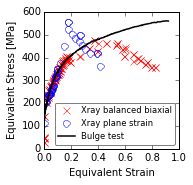

In [17]:
fig=plt.figure(figsize=(2.5,2.3))
ax=fig.add_subplot(111)
ax.plot(fc_BB_comb.epsilon_vm[:-3], fc_BB_comb.sigma_vm[:-3],'rx',label='Xray balanced biaxial')

ax.plot(fc_psrd.epsilon_vm, fc_psrd.sigma_vm,'o',mec='b',mfc='None',label='Xray plane strain')
ax.plot(fc_psrd1.epsilon_vm, fc_psrd1.sigma_vm,'o',mec='b',mfc='None')


ax.plot(E,S,'-k',label='Bulge test')
ax.legend(loc='lower right')

ax.set_xlabel('Equivalent Strain')
ax.set_ylabel('Equivalent Stress [MPa]')
fig.savefig('bulge_xray_comparison.pdf',bbox_inches='tight')



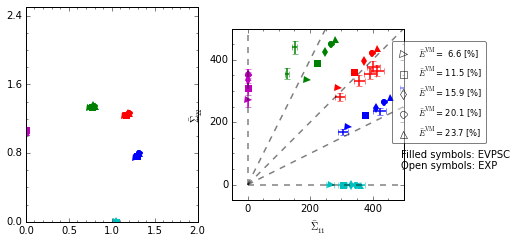

In [18]:
"""
print max(fc_utd.work)
print max(fc_urd.work)
print max(fc_BB_comb.work[fBB])
print max(fc_psrd.work[fPR])
print max(fc_psrd1.work[fPR1])
print max(fc_pstd.work[fPT])

print max(fc_utd.epsilon_vm)
print max(fc_urd.epsilon_vm)
print max(fc_BB_comb.epsilon_vm[fBB])
print max(fc_psrd.epsilon_vm[fPR])
print max(fc_psrd1.epsilon_vm[fPR1])
print max(fc_pstd.epsilon_vm[fPT])
"""

fig=plt.figure(figsize=(7,4))
ax1=fig.add_subplot(121)
ax=fig.add_subplot(122)

Err=0.05 ## error pertaing to each stress components


## least amount of work: 25.3659 of PSRD
wrk_max=70.
n_contour=5
work_ref = np.linspace(0,wrk_max,n_contour+1)[1:]


## interpolate sig11 and sig22
intp=np.interp  ## (x,xp,fp,left=None, right=None)

fcs=[fc_utd, fc_pstd, fc_BB_comb,fc_psrd, fc_urd]

fcms=[evpsc_utd,evpsc_pstd,evpsc_bb,evpsc_psrd,evpsc_urd]

cs=['m','g','r','b','c']
mk=['>','s','d','o','^']

evm_urd=intp(x=work_ref,xp=fc_urd.work,fp=fc_urd.epsilon_vm)

wrk_rd=fc_urd.w
_sn_ = intp(x=work_ref,xp=wrk_rd,fp=fc_urd.sigma[0,0])

for i in xrange(len(fcs)):
    fc_current=fcs[i]
    
    s11=fc_current.sigma[0,0]
    s22=fc_current.sigma[1,1]
    
    _s11_ = intp(x=work_ref,xp=fc_current.work,fp=s11)
    _s22_ = intp(x=work_ref,xp=fc_current.work,fp=s22)
    
    
    for j in xrange(n_contour):
        #l,=plot(_s11_[j],_s22_[j],mk[j],mec=cs[i],mfc='None')
        ax.errorbar(_s11_[j],_s22_[j],yerr=_s22_[j]*Err,xerr=_s11_[j]*Err,mec=cs[i],color=cs[i],mfc='None')
        ax1.plot(_s11_[j]/_sn_[j],_s22_[j]/_sn_[j],color=cs[i],mec=cs[i],mfc='None')
    

    ## EVPSC
    fc_current=fcms[i]
    
    s11=fc_current.sigma[0,0]
    s22=fc_current.sigma[1,1]
    
    _s11_ = intp(x=work_ref,xp=fc_current.work,fp=s11)
    _s22_ = intp(x=work_ref,xp=fc_current.work,fp=s22)

    for j in xrange(n_contour):
        ax.plot(_s11_[j],_s22_[j],mk[j],mfc=cs[i],mec='None')
        ax1.plot(_s11_[j]/_sn_[j],_s22_[j]/_sn_[j],mk[j],mfc=cs[i],mec='None')
        
    if i==0:
        for j in xrange(n_contour):
            ax.plot(-100,0,mk[j],mfc='None',mec='k',label=r'$\bar{E}^\mathrm{VM}$=%5.1f [%%]'%(evm_urd[j]*100))

#    fcms=[evpsc_utd,evpsc_pstd,evpsc_bb,evpsc_psrd,evpsc_urd]

ax.set_xlim(-50,500)
ax.set_ylim(-50,500)

ax.set_aspect('equal')
ax1.set_aspect('equal')

ax.legend(bbox_to_anchor=(1.5,0.95),ncol=1,numpoints=1)

ax.set_xlabel(r'$\bar{\Sigma}_{11}$')
ax.set_ylabel(r'$\bar{\Sigma}_{22}$')   

fld_pp.draw_guide(gca(),r_line=[0,0.5,1,1.5,2],max_r=1000)

ax.xaxis.set_major_locator(MaxNLocator(nbins=4))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.minorticks_on()
ax1.xaxis.set_major_locator(MaxNLocator(nbins=4))
ax1.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax1.minorticks_on()

ax.text(490,50,'Filled symbols: EVPSC\nOpen symbols: EXP')   
fig.savefig('work-contour.pdf')

len(evm_ref): 100
labs, popt1, popt2
Voce fit [  223.18518904   229.56535529  1148.10698714  1457.39341096] [  219.65205443   211.05402569  1001.11045335   660.11363668]
len(evm_ref):

/Users/yj/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/Users/yj/anaconda/lib/python2.7/site-packages/scipy/optimize/minpack.py:604: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


 28
labs, popt1, popt2
Voce fit [ 103.83125309   17.19605573  348.03017645  104.77292873] [   231.91777529     51.91777528   1970.98897147  19987.40571844]
len(evm_ref): 25
labs, popt1, popt2
Voce fit [   215.76020546    215.76020546   1678.31952644  18225.86974804] [  109.89137398   109.89137398   891.03975863  8881.63266915]


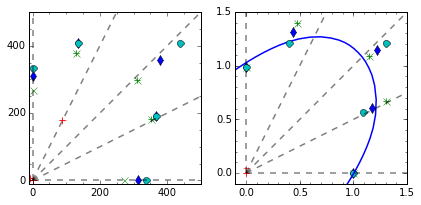

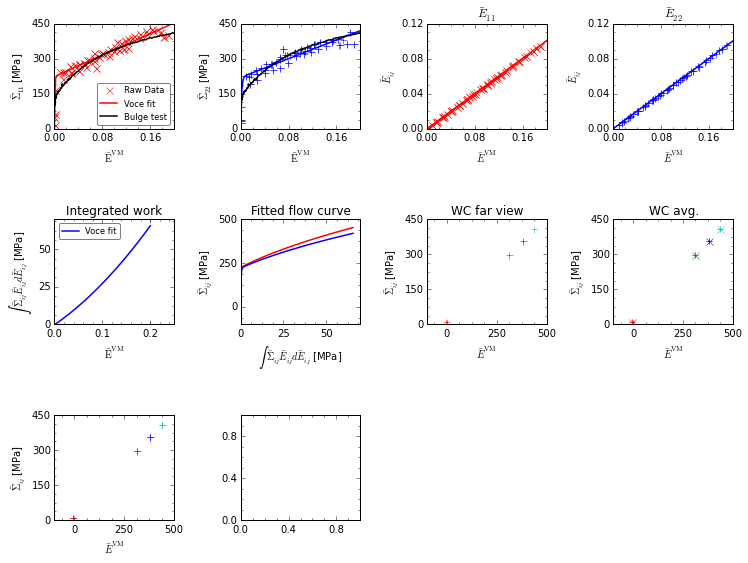

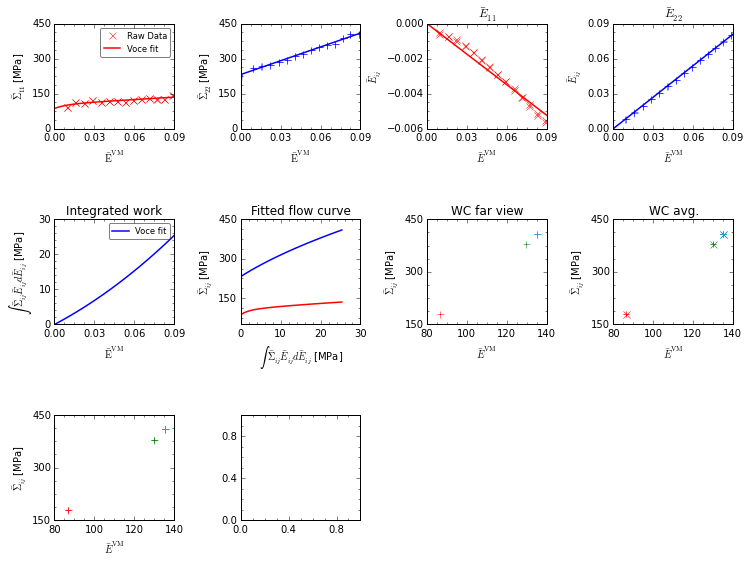

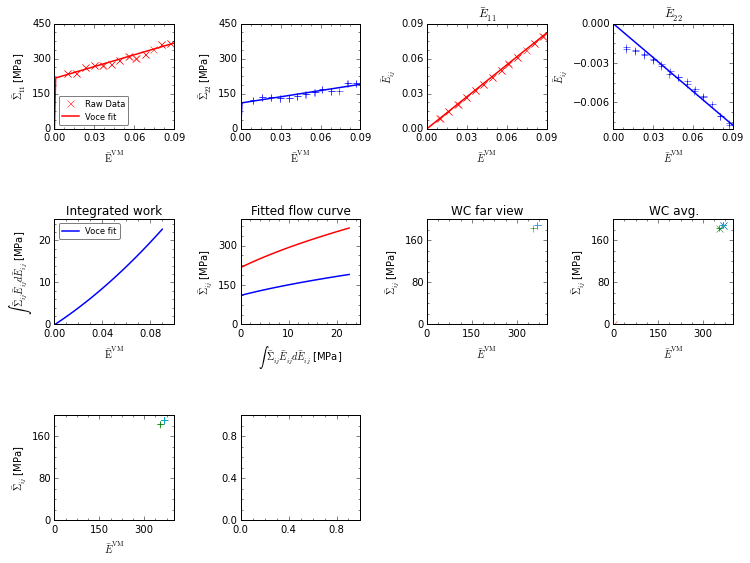

In [19]:
m=['x','+','.','d','^'] ## mothods
c=['b','g','r','c','m'] ## work levels

fig=plt.figure(figsize=(7,4.5))
ax=fig.add_subplot(121)
ax1=fig.add_subplot(122)

# mx_eps=[0.4,0.15,0.10]

neps=100
ncnt=4
mxwk=60.
wrk_ref=np.linspace(0,mxwk,ncnt)


m=['+','x','d','o','^']
c=['r','g','b','c','m']



## urd/utd
s11=intp(wrk_ref,fc_urd.w,fc_urd.sigma[0,0])
s22=np.zeros(len(s11))
sn = s11.copy()
for i in range(len(s11)):
    ax.plot(s11[i],s22[i],m[i]+c[i])
    ax1.plot(s11[i]/sn[i],s22[i]/sn[i],m[i]+c[i])


s22=intp(wrk_ref,fc_utd.w,fc_utd.sigma[1,1])
s11=np.zeros(len(s22))
for i in range(len(s11)):
    ax.plot(s11[i],s22[i],m[i]+c[i])
    ax1.plot(s11[i]/sn[i],s22[i]/sn[i],m[i]+c[i])

#mx_eps=[0.15,0.15,0.10]


dat=np.loadtxt('/Users/yj/Documents/ExpDat/IFSteel/PCYS_vpsc_init_2k.OUT',skiprows=1).T
s1,s2,d1,d2=dat
s11=(-s1*np.sqrt(2.)-s2*np.sqrt(6.))/2.
s22=s1*np.sqrt(2)+s11
#ax.plot(s11,s22)
ax1.plot(s11/128.,s22/128.,label='VPSC')
#s11=s1


## Multiaxial data
FC_smoothed_bb,dat,dat_e,fig_bb = smooth_fc(raw_fc=fc_BB_comb,neps=neps,max_evm=0.20,ncnt=ncnt,max_wrk=mxwk,iplot=True)
fig_bb.axes[0].plot(E,S,'-k',label='Bulge test')
fig_bb.axes[1].plot(E,S,'-k',label='Bulge test')
fig_bb.axes[0].set_xlim(0.,0.20)
fig_bb.axes[1].set_xlim(0.,0.20)
fig_bb.axes[0].legend(loc='best',fancybox=True,framealpha=0.5)
fig_bb.savefig('fig_BB_smooth.pdf',bbox_inches='tight')
for i in range(len(dat[0])):
    ax.errorbar(dat[0][i],dat[1][i],xerr=dat_e[0][i],yerr=dat_e[1][i],marker=m[i],color=c[i])
    ax1.errorbar(dat[0][i]/sn[i],dat[1][i]/sn[i],xerr=dat_e[0][i]/sn[i],yerr=dat_e[1][i]/sn[i],marker=m[i],color=c[i])

##
FC_smoothed_pstd,dat,dat_e,fig_pstd = smooth_fc(raw_fc=fc_pstd,neps=neps,x0=0,y10=90,y20=180,
                                                max_evm=0.09,ncnt=ncnt,max_wrk=mxwk,iplot=True)
fig_pstd.savefig('fig_PSTD_smooth.pdf',bbox_inches='tight')
for i in range(len(dat[0])):
    ax.errorbar(dat[0][i],dat[1][i],xerr=dat_e[0][i],yerr=dat_e[1][i],marker=m[i],color=c[i])
    ax1.errorbar(dat[0][i]/sn[i],dat[1][i]/sn[i],xerr=dat_e[0][i]/sn[i],yerr=dat_e[1][i]/sn[i],marker=m[i],color=c[i])
#ax.errorbar(dat[0],dat[1],xerr=dat_e[0],yerr=dat_e[1])
#ax1.errorbar(dat[0]/sn,dat[1]/sn,xerr=dat_e[0]/sn,yerr=dat_e[1]/sn)
##
FC_smoothed_psrd,dat,dat_e,fig_psrd = smooth_fc(raw_fc=fc_psrd,neps=neps,max_evm=0.09,ncnt=ncnt,max_wrk=mxwk,iplot=True)
fig_psrd.savefig('fig_PSRD_smooth.pdf',bbox_inches='tight')
for i in range(len(dat[0])):
    ax.errorbar(dat[0][i],dat[1][i],xerr=dat_e[0][i],yerr=dat_e[1][i],marker=m[i],color=c[i])
    ax1.errorbar(dat[0][i]/sn[i],dat[1][i]/sn[i],xerr=dat_e[0][i]/sn[i],yerr=dat_e[1][i]/sn[i],marker=m[i],color=c[i])
#ax.errorbar(dat[0],dat[1],xerr=dat_e[0],yerr=dat_e[1])
#ax1.errorbar(dat[0]/sn,dat[1]/sn,xerr=dat_e[0]/sn,yerr=dat_e[1]/sn)

ax.set_aspect('equal'); ax1.set_aspect('equal')

draw_guide(ax,r_line=[0,0.5,1,1.5,2],max_r=1000)
draw_guide(ax1,r_line=[0,0.5,1,1.5,2],max_r=1000)

ax.set_xlim(-10,500); ax.set_ylim(-10,500)
ax1.set_xlim(-0.1,1.5); ax1.set_ylim(-0.1,1.5)

for ax in fig.axes:
    ax.xaxis.set_major_locator(MaxNLocator(nbins=4))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
    ax.minorticks_on()

fig.savefig('fig_wk_smoothed.pdf',bbox_inches='tight')

### PSTD smoothing issue

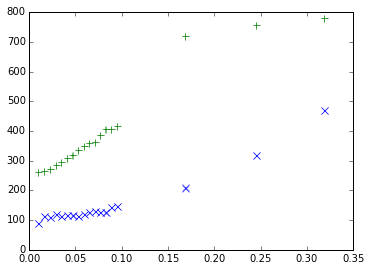

In [22]:
#plot(fc_pstd.sigma[0,0],fc_pstd.sigma[1,1],'x')
#plot(fc_pstd.epsilon_vm,fc_pstd.sigma_vm,'x')
plot(fc_pstd.epsilon_vm,fc_pstd.sigma[0,0],'x')
plot(fc_pstd.epsilon_vm,fc_pstd.sigma[1,1],'+')

len(evm_ref): 30
labs, popt1, popt2
Voce fit [ 102.96873825  103.2972194   377.21517467  231.41716   ] [   232.38267352    232.38267352   1958.15513528  23034.47864958]


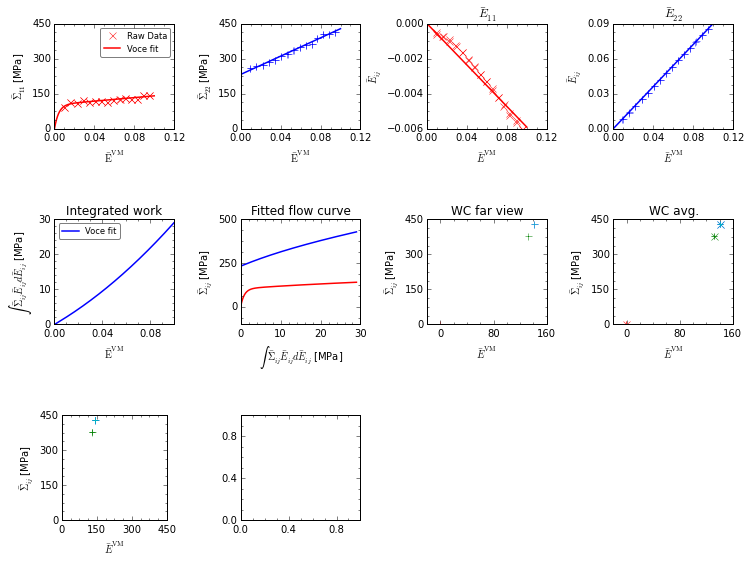

In [23]:
##
FC_smoothed_pstd,dat,dat_e,fig_pstd = smooth_fc(
    raw_fc=fc_pstd,neps=300,
    max_evm=0.10,ncnt=ncnt,max_wrk=mxwk,iplot=True)
gcf().axes[8].set_xlim(0.,450)
gcf().axes[8].set_ylim(0.,450)
gcf().axes[8].set_aspect('equal')

fig_pstd.savefig('fig_PSTD_smooth.pdf',bbox_inches='tight')

##

### Von Mises yield surface

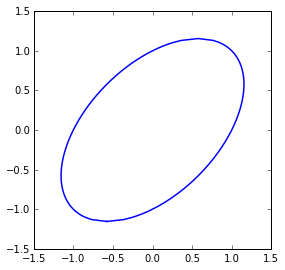

In [24]:
def VM(s11,s22):
    sij = np.array([[s11,0,0],[0,s22,0],[0,0,0]])
    dij = np.identity(3)
    
    ## Deviatoric stress
    """
    vij = sij - 1/3 dij * sij
    """
    vij=np.zeros((3,3))
    
    for i in xrange(3):
        for j in xrange(3):
            vij[i,j] = sij[i,j] - 1/3. * dij[i,j] * sij[i,j]


    svm=0.
    for i in xrange(3):
        for j in xrange(3):
            svm=svm+3./2.*vij[i,j]*vij[i,j]
    svm=np.sqrt(svm)
    
    #print svm
    return svm
            

def VM_ys(y=1):
    sigma2=np.linspace(-np.sqrt(4./3.)*y,np.sqrt(4./3.)*y,100)
    sigma1_p= 0.5 * (sigma2 + np.sqrt(4*y**2-3*sigma2**2))
    sigma1_m=0.5 *  (sigma2 - np.sqrt(4*y**2-3*sigma2**2))
    #plot(sigma1_p,sigma2,'rx')
    #plot(sigma1_m,sigma2,'rx')
    x=sigma1_p.tolist()+sigma1_m.tolist()[::-1]
    y=sigma2.tolist()+sigma2.tolist()[::-1]
    
    plot(x,y)
    gca().set_aspect('equal')
    return x,y
    
    
VMx,VMy=VM_ys()

### FC_smoothed 

$\bar{E}^\mathrm{VM} \bar{\Sigma}^\mathrm{VM}$

In [25]:
fac=15./6.
print fac

2.5


[ 0.  2.  4.  6.  8.]


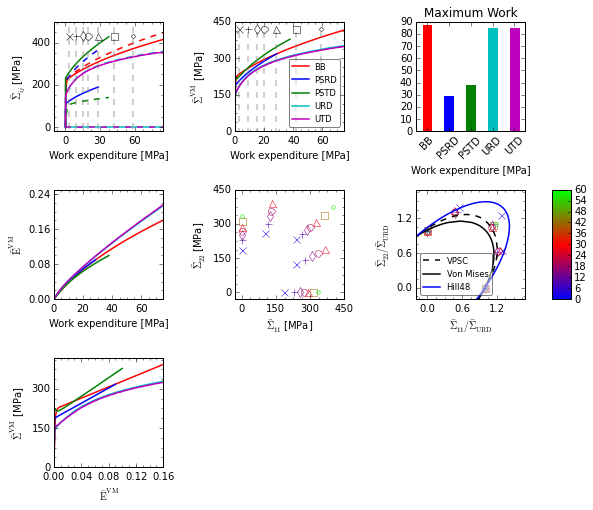

In [26]:
fcs=[FC_smoothed_bb[0],FC_smoothed_psrd[0],FC_smoothed_pstd[0],fc_urd,fc_utd]

fig=plt.figure(figsize=(5*fac,5*3./2.))
gs=GS(32,30)

ax1=fig.add_subplot(gs[0:8,2:7])
ax2=fig.add_subplot(gs[0:8,10:15])
ax3=fig.add_subplot(gs[0:8,18:23])
ax4=fig.add_subplot(gs[12:20,2:7])
ax5=fig.add_subplot(gs[12:20,10:15])
ax6=fig.add_subplot(gs[12:20,18:23])
ax7=fig.add_subplot(gs[24:32,2:7])
axcb=fig.add_subplot(gs[12:20,24:25])


c=['r','b','g','c','m']
labs=['BB','PSRD','PSTD','URD','UTD']
wrk_mx=[]
for i in xrange(len(fcs)):
    _fc_ = fcs[i]

    w=_fc_.w
    wrk_mx.append(max(w))
    s11=_fc_.sigma[0,0]
    s22=_fc_.sigma[1,1]
    e11=_fc_.epsilon[0,0]
    e22=_fc_.epsilon[1,1]
    
    ax1.plot(w,s11,c[i]+'--')
    ax1.plot(w,s22,c[i]+'-',label=labs[i])

    ax2.plot(w,_fc_.sigma_vm,c[i]+'-',label=labs[i])
    ax7.plot(_fc_.epsilon_vm,_fc_.sigma_vm,c[i]+'-',label=labs[i])
    ax4.plot(w,_fc_.epsilon_vm,c[i]+'-')

ax2.set_xlim(0.,75); ax2.set_ylim(0,450)
ax1.set_xlim(-10.,85);   ax1.set_ylim(-20,)
ax5.set_xlim(-30,450); ax5.set_ylim(-30,450)
ax6.set_xlim(-0.2,1.7); ax6.set_ylim(-0.2,1.7)   
ax4.set_xlim(0.,75)

#ax1.legend(loc='best',fancybox=True,framealpha=0.5)
ax2.legend(loc='best',fancybox=True,framealpha=0.5)

ax1.set_ylabel(r'$\bar{\Sigma}_{ij}$ [MPa]')
#ax1.set_xlabel(r'$\int\ \bar{\Sigma}_{ij} \bar{E}_{ij} d \bar{E}_{ij}$ [MPa]')
ax1.set_xlabel('Work expenditure [MPa]')
ax2.set_ylabel(r'$\bar{\Sigma}^\mathrm{VM}$ [MPa]')
#ax2.set_xlabel(r'$\int\ \bar{\Sigma}_{ij} \bar{E}_{ij} d \bar{E}_{ij}$ [MPa]')
ax2.set_xlabel('Work expenditure [MPa]')
#ax3.set_ylabel(r'$\int\ \bar{\Sigma}_{ij} \bar{E}_{ij} d \bar{E}_{ij}$ [MPa]')
ax3.set_xlabel('Work expenditure [MPa]')
#ax4.set_xlabel(r'$\int\ \bar{\Sigma}_{ij} \bar{E}_{ij} d \bar{E}_{ij}$ [MPa]')
ax4.set_xlabel('Work expenditure [MPa]')
ax4.set_ylabel(r'$\mathrm{\bar{E}^{VM}}$')
ax5.set_xlabel(r'$\bar{\Sigma}_{11}$ [MPa]')
ax5.set_ylabel(r'$\bar{\Sigma}_{22}$ [MPa]')
ax6.set_xlabel(r'$\bar{\Sigma}_{11}/\bar{\Sigma}_\mathrm{URD}$')
ax6.set_ylabel(r'$\bar{\Sigma}_{22}/\bar{\Sigma}_\mathrm{URD}$')
ax7.set_ylabel(r'$\mathrm{\bar{\Sigma}^{VM}}$ [MPa]')
ax7.set_xlabel(r'$\mathrm{\bar{E}^\mathrm{VM}}$')


id=np.linspace(0.,8.,5)
print id

ax3.set_title('Maximum Work')
bar_list = ax3.bar(id,wrk_mx,align='center')
for i in xrange(len(bar_list)):
    bar_list[i].set_color(c[i])

ax3.set_xticks(id)
ax3.set_xticklabels(['BB','PSRD','PSTD','URD','UTD'],rotation=45.)

from MP.lib import mpl_lib

## work levels
wrk_levels=[3,9,15,20,28,42,59]

##


norm=mpl.colors.Normalize(0,60)
cmap, mc = mpl_lib.norm_cmap(mn=0,mx=60,cm_name='brg')


m=['x','+','d','o','^','s','.']
for i in range(len(wrk_levels)):
    wrk=wrk_levels[i]
    ax1.plot([wrk,wrk],[-10,500],'--',color='gray',alpha=0.5)
    ax2.plot([wrk,wrk],[-10,410],'--',color='gray',alpha=0.5)  
    ax1.plot(wrk,430,m[i],color='k',mec='k',mfc='None')
    ax2.plot(wrk,418,m[i],color='k',mec='k',mfc='None')
    #ax3.plot(ax3.get_xlim(),[wrk,wrk],'--',color='red',alpha=0.5)
    
#ax3.set_xlim(-1,10)

#ax1.set_title('Fitted flow stress')


#m=['+','x','^','d','o','.']
nv=[]
wdat=np.zeros((2,len(wrk_levels),len(fcs)))
for i in range(len(wrk_levels)):
    wrk = wrk_levels[i]
    for j in range(len(fcs)):
        try:
            w=fcs[j][0].w
        except:
            w=fcs[j].w
        s11,s22=fcs[j].sigma[0,0],fcs[j].sigma[1,1]

        if wrk_mx[j]<wrk: 
            _s11_=np.nan
            _s22_=np.nan
        else:        
            _s11_ = interp(wrk,w,s11)
            _s22_ = interp(wrk,w,s22)
            mrk='o'
            if i==0: mrk='x'
            ax5.plot(_s11_,_s22_,m[i],mfc='None',mec=mc.to_rgba(wrk))
        
        wdat[0,i,j]=_s11_
        wdat[1,i,j]=_s22_

for i in xrange(len(wrk_levels)):
    for j in xrange(len(fcs)):
        s11,s22=wdat[:,i,j]
        sn=wdat[0,i,3]
        mrk='o'
        if i==0: mrk='x'
        ax6.plot(s11/sn,s22/sn,m[i],mfc='None',mec=mc.to_rgba(wrk_levels[i]))
        
mpl.colorbar.ColorbarBase(axcb,cmap=cmap,spacing='proportional',orientation='vertical',
                       norm=norm,filled=True)#,format=r'$\int $')
#axcb.yaxis.set_major_locator(MaxNLocator(nbins=3))


dat=np.loadtxt('/Users/yj/Documents/ExpDat/IFSteel/PCYS_vpsc_init_2k.OUT',skiprows=1).T
s1,s2,d1,d2=dat
s11=(-s1*np.sqrt(2.)-s2*np.sqrt(6.))/2.
s22=s1*np.sqrt(2)+s11
#ax.plot(s11,s22)
ax6.plot(s11/128.,s22/128.,'--k',label='VPSC')
ax6.plot(VMx,VMy,'-k',label='Von Mises')

## Hill 48
dat=np.loadtxt('yld-loc2d_IF_Hill48R.txt',skiprows=1,delimiter=',').T
ax6.plot(dat[0],dat[1],label='Hill48')
#dat=np.loadtxt('yld-loc2d_IF_Hill48R2.txt',skiprows=1,delimiter=',').T
#ax6.plot(dat[0],dat[1],label='Hill48-2')

ax6.legend(loc='lower left',fancybox=True, framealpha=0.5)


for ax in fig.axes[0:2]+fig.axes[3:7]:
    ax.xaxis.set_major_locator(MaxNLocator(nbins=4))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
    ax.minorticks_on()
    

#ax4.set_xlim(0,35)
#ax4.set_ylim(0,0.11)

ax7.set_xlim(0.,0.16)
ax7.set_ylim(0.,420)

fig.savefig('Xray_DIC_analysis.pdf',bbox_inches='tight')


In [27]:
np.identity(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [28]:
'power, voce, voce2, swift'
m=['x','+','.','d','^'] ## methods
c=['b','g','r','c','m'] ## work levels

In [29]:
fc_psrd1.nstp

12

## For actual plotting suitble for the paper

RS.pck 20120711
RS.pck 20120720
RS.pck 20120723
RS.pck 20141028
RS.pck 20141029
RS_20120713.pck 20120713
RS_20120717.pck 20120717


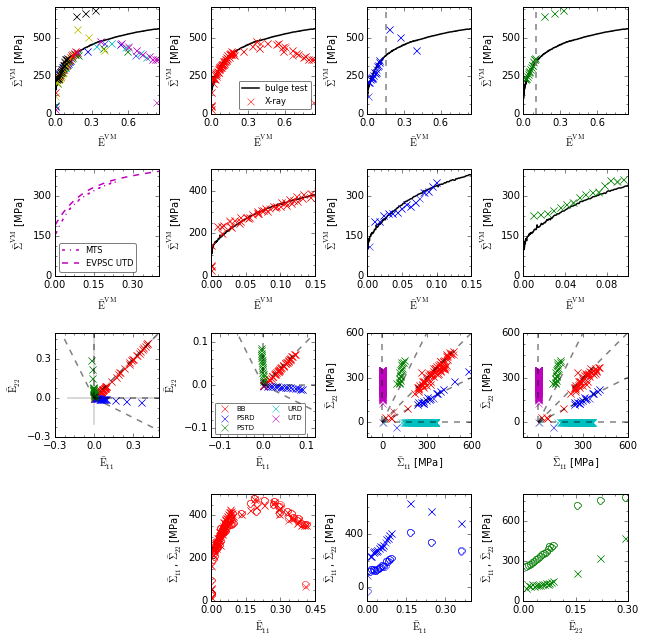

In [30]:
fx=13.5;fy=16
fig=plt.figure(figsize=(fx,fy))
gs=GS(80,5,wspace=0.5,hspace=0.2,bottom=0.2)
ax1=fig.add_subplot(gs[5:15,0])
ax2=fig.add_subplot(gs[5:15,1])
ax3=fig.add_subplot(gs[5:15,2])
ax4=fig.add_subplot(gs[5:15,3])

ax5=fig.add_subplot(gs[20:30,0])
ax6=fig.add_subplot(gs[20:30,1])
ax7=fig.add_subplot(gs[20:30,2])
ax8=fig.add_subplot(gs[20:30,3])

ax9 =fig.add_subplot(gs[35:45,0])
ax10=fig.add_subplot(gs[35:45,1])
ax11=fig.add_subplot(gs[35:45,2])
ax12=fig.add_subplot(gs[35:45,3])

ax14=fig.add_subplot(gs[50:60,1])
ax15=fig.add_subplot(gs[50:60,2])
ax16=fig.add_subplot(gs[50:60,3])

## inserted subplot for BB
# ax_bb=fig.add_axes((0.40,0.685,0.064,0.0353),axisbg='white')

## bulge test data
ax1.plot(E,S,'-k');ax2.plot(E,S,'-k',label='Bulge')
ax3.plot(E,S,'-k');ax4.plot(E,S,'-k')
#ax5.plot(E,S,'-k');
ax6.plot(E,S,'-k')
ax7.plot(E,S,'-k');ax8.plot(E,S,'-k')
#ax_bb.plot(E,S,'-k')


## uniaxial TD
# x=np.array(true_strain)
# exx=utd_exx(x)
#x=x-x[0]
# ax5.plot(x,true_stress,'m-',label='Load cell')
ax5.plot(fc_utd.epsilon_vm,fc_utd.sigma_vm,'m-.',label='MTS')

# fc_utd_tgh = fc()
#fc_utd_tgh.get_strain(x,1,1)
#fc_utd_tgh.get_strain(exx,0,0)
#fc_utd_tgh.get_strain(-x-exx,2,2)

# fc_utd_tgh.get_stress(true_stress,1,1)
#fc_utd_tgh.set_zero_sigma_ij(0,0),fc_utd_tgh.set_zero_sigma_ij(2,2)


# fc_utd_tgh.set_zero_shear_strain()
#fc_utd_tgh.set_zero_shear_stress()






# ax5.plot(x,xray_stress_211,'-o',mec='m',color='m',mfc='None',label='Xray {211}')
# ax5.plot(eps_xray,sig_xray,'-s',mec='m',color='m',mfc='None',label='Xray {310}')
ax5.plot(evpsc_utd.epsilon_vm, evpsc_utd.sigma_vm,'m--',label='EVPSC UTD')
ax5.legend(loc='best',numpoints=1,ncol=1,framealpha=0.5,fancybox=True)

# exx=utd_exx(x)
# ax9.plot(exx,x,'mx')
# ax10.plot(exx,x,'mx')

datS=np.loadtxt('/Users/yj/Documents/ExpDat/IFSteel/uni/avgstr_090.txt').T
ax11.plot(np.zeros(len(datS[0])),datS[1],'x',mec='m',color='m',mfc='None')
ax12.plot(np.zeros(len(datS[0])),datS[1],'x',mec='m',color='m',mfc='None')


## X-ray UTD
#ax11.plot(np.zeros(len(x)),xray_stress_211,'-o',mec='m',color='m',mfc='None')#,label='Xray {210}')
#ax11.plot(np.zeros(len(eps_xray)),sig_xray,'-s',mec='m',color='m',mfc='None')#,label='Xray {310}')
#ax12.plot(np.zeros(len(x)),xray_stress_211,'-o',mec='m',color='m',mfc='None')#,label='Xray {210}')
#ax12.plot(np.zeros(len(eps_xray)),sig_xray,'-s',mec='m',color='m',mfc='None')#,label='Xray {310}')


## uniaxial RD
datS=np.loadtxt('/Users/yj/Documents/ExpDat/IFSteel/uni/avgstr_000.txt').T
exx=datS[0]
# eyy=urd_eyy(exx)
# ax9.plot(exx,eyy,'cx')
# ax10.plot(exx,eyy,'cx')

ax11.plot(datS[1],np.zeros(len(datS[1])),'x',mec='c',color='c',mfc='None')
ax12.plot(datS[1],np.zeros(len(datS[1])),'x',mec='c',color='c',mfc='None')

c=['r','r','r','r','r','g','b','m']

## data trim
mx_eps=[0.15,0.15,0.10]
mx_sig=[500,400,400]


rs_cnt=[]
for i in xrange(len(fn_rs)-1):
    date = os.path.split(fn_rs[i])[0].split(os.sep)[-1]
    label = date
    label=os.path.split(fn_rs[i])[-1]
    print label, date
    f=open(fn_rs[i],'rb')
    myrs=pickle.load(f)
    myrs.fn_orig=fn_rs[i]
    
    ax1.plot(myrs.EXP.flow.epsilon_vm, myrs.flow.sigma_vm,'x')#,color=c[i])
    #lab==None
    #if i==0: lab='X-ray'
    if i<5: 
        ax2.plot(myrs.EXP.flow.epsilon_vm, myrs.flow.sigma_vm,'rx',label=lab)
        ax14.plot(myrs.EXP.flow.epsilon[0,0],myrs.flow.sigma[0,0],'rx',label=lab)
        ax14.plot(myrs.EXP.flow.epsilon[0,0],myrs.flow.sigma[1,1],'o',mec='r',mfc='None',label=lab)
    if i==5 or i==7: 
        ax3.plot(myrs.EXP.flow.epsilon_vm, myrs.flow.sigma_vm,'bx')
        ax15.plot(myrs.EXP.flow.epsilon[0,0],myrs.flow.sigma[0,0],'bx',label=lab)
        ax15.plot(myrs.EXP.flow.epsilon[0,0],myrs.flow.sigma[1,1],'o',mec='b',mfc='None',label=lab)
    if i==6: 
        ax4.plot(myrs.EXP.flow.epsilon_vm, myrs.flow.sigma_vm,'gx')
        ax16.plot(myrs.EXP.flow.epsilon[1,1],myrs.flow.sigma[0,0],'gx',label=lab)
        ax16.plot(myrs.EXP.flow.epsilon[1,1],myrs.flow.sigma[1,1],'o',mec='g',mfc='None',label=lab)        
        
    if i<5: 
        ax6.plot(myrs.EXP.flow.epsilon_vm, myrs.flow.sigma_vm,'rx')
        #ax_bb.plot(myrs.EXP.flow.epsilon_vm,myrs.flow.sigma_vm,'rx')
    if i==5 or i==7: ax7.plot(myrs.EXP.flow.epsilon_vm, myrs.flow.sigma_vm,'bx')
    if i==6: ax8.plot(myrs.EXP.flow.epsilon_vm, myrs.flow.sigma_vm,'gx')
        
    x=myrs.EXP.flow.epsilon[0,0]
    y=myrs.EXP.flow.epsilon[1,1]
    if i<5:          
        ax9.plot(x,y,'rx')
        flt=myrs.EXP.flow.epsilon_vm<mx_eps[0]
        ax10.plot(x[flt],y[flt],'rx')
    if i==5 or i==7: 
        ax9.plot(x,y,'bx')
        flt=myrs.EXP.flow.epsilon_vm<mx_eps[1]
        ax10.plot(x[flt],y[flt],'bx')
    if i==6:         
        ax9.plot(x,y,'gx')  
        flt=myrs.EXP.flow.epsilon_vm<mx_eps[2]
        ax10.plot(x[flt],y[flt],'gx') 
        
    x=myrs.flow.sigma[0,0]
    y=myrs.flow.sigma[1,1]
    
    if i<5:          
        ax11.plot(x,y,'rx')
        flt=myrs.EXP.flow.epsilon_vm<mx_eps[0]
        ax12.plot(x[flt],y[flt],'rx')
    if i==5 or i==7: 
        ax11.plot(x,y,'bx')
        flt=myrs.EXP.flow.epsilon_vm<mx_eps[1]
        ax12.plot(x[flt],y[flt],'bx')
    if i==6:         
        ax11.plot(x,y,'gx')  
        flt=myrs.EXP.flow.epsilon_vm<mx_eps[2]
        ax12.plot(x[flt],y[flt],'gx') 

    rs_cnt.append(myrs)


#ax2.plot([mx_eps[0],mx_eps[0]],[0,700],'--',color='gray')
ax3.plot([mx_eps[1],mx_eps[1]],[0,700],'--',color='gray')
ax4.plot([mx_eps[2],mx_eps[2]],[0,700],'--',color='gray')

for ax in fig.axes[:8]:
    ax.set_xlabel(r'$\mathrm{\bar{E}^\mathrm{VM}}$')
    ax.set_ylabel(r'$\mathrm{\bar{\Sigma}^{VM}}$ [MPa]')

for ax in fig.axes[:4]:
    ax.set_ylim(0,700);
    ax.set_xlim(0.,0.85)
    
for ax in fig.axes[10:12]:
    ax.set_ylim(-100,600);
    ax.set_xlim(-100,600)
    
for i in xrange(len(fig.axes[5:8])):
    ax=fig.axes[5:][i]
    ax.set_ylim(0,mx_sig[i]);
    ax.set_xlim(0.,mx_eps[i]);

for ax in fig.axes:    
    ax.xaxis.set_major_locator(MaxNLocator(nbins=3))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
    ax.minorticks_on()
    

for ax in [ax9, ax10]:
    ax.set_xlabel(r'$\mathrm{\bar{E}_{11}}$')
    ax.set_ylabel(r'$\mathrm{\bar{E}_{22}}$')
    
for ax in [ax11, ax12]:
    ax.set_xlabel(r'$\mathrm{\bar{\Sigma}_{11}}$ [MPa]')
    ax.set_ylabel(r'$\mathrm{\bar{\Sigma}_{22}}$ [MPa]')    

for ax in [ax14,ax15,ax16]:
    ax.set_ylabel(r'$\mathrm{\bar{\Sigma}_{11}}\ $, $\mathrm{\bar{\Sigma}_{22}}$ [MPa]')
    
for ax in [ax14,ax15]:
    ax.set_xlabel(r'$\mathrm{\bar{E}_{11}}$')
ax16.set_xlabel(r'$\mathrm{\bar{E}_{22}}$')
"""
ax, r_line=[-0.5, 0.0, 1], max_r=2, ls='--', color='k', alpha=0.5
"""
draw_guide(ax9,r_line=[-0.5,0,1,2,2.5],max_r=1,ls='--')
draw_guide(ax10,r_line=[-0.5,0,1,2,2.5],max_r=1,ls='--')
draw_guide(ax11,r_line=[0,0.5,1,1.5,2],max_r=1000,ls='--')
draw_guide(ax12,r_line=[0,0.5,1,1.5,2],max_r=1000,ls='--')


ax_bb.set_xlim(0.,0.05)
ax_bb.set_ylim(100,300)

ax2.legend(('bulge test','X-ray'), loc='best',fancybox=True,framealpha=0.5)
ax5.set_xlim(0,0.4)

ax9.plot([-0.2,0.6],[0,0],'k-',alpha=0.2)
ax9.plot([0,0],[-0.2,0.6],'k-',alpha=0.2)
ax9.plot([0,0.6],[0,0.6],'k-',alpha=0.2)


ax10.plot(-10,-10,'rx',label='BB')
ax10.plot(-10,-10,'bx',label='PSRD')
ax10.plot(-10,-10,'gx',label='PSTD')
ax10.plot(-10,-10,'cx',label='URD')
ax10.plot(-10,-10,'mx',label='UTD')
ax10.set_xlim(-0.12,0.12); ax10.set_ylim(-0.12,0.12)
ax10.legend(loc='lower left',ncol=2,fontsize=7)
ax9.set_xlim(-0.3,0.5); ax9.set_ylim(-0.3,0.5)

for ax in [ax9,ax10,ax11,ax12]:
    ax.set_aspect('equal')


    
gcf().savefig('collection_pp.pdf',bbox_inches='tight')

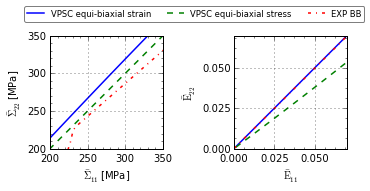

In [31]:
fig=plt.figure(figsize=(5,2.5))
ax=fig.add_subplot(121)
ax1=fig.add_subplot(122)
fc_vpsc_bb=fc()

## equi-biaxial strain
fc_vpsc_bb.get_model('/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/BB/STR_STR.VPSC_BB')
s=fc_vpsc_bb.sigma
for i in xrange(3):
    s[i,i]=s[i,i]-s[2,2]
ax.plot(s[0,0],s[1,1],'-',label='VPSC equi-biaxial strain')
ax.set_xlim(0.,)
ax.set_ylim(0.,)


## equi-biaxial stress
dat_es=np.loadtxt('/Users/yj/Documents/ExpDat/IFsteel/Marciniak-X-ray-IF/BB/STR_STR.VPSC_ES').T
ax.plot(dat_es[12],dat_es[13],'--',label='VPSC equi-biaxial stress')
ax1.plot(fc_vpsc_bb.epsilon[0,0],fc_vpsc_bb.epsilon[1,1],label='VPSC equi-biaxial strain')
ax1.plot(dat_es[6],dat_es[7],'--',label='VPSC equi-biaxial stress')


## Add experimental data (smoothed BB)

ax.plot(FC_smoothed_bb[0].sigma[0,0],FC_smoothed_bb[0].sigma[1,1],'-.',label='EXP BB')
ax1.plot(FC_smoothed_bb[0].epsilon[0,0],FC_smoothed_bb[0].epsilon[1,1],'-.',label='EXP BB')


ax1.set_xlabel(r'$\mathrm{\bar{E}_{11}}$')
ax1.set_ylabel(r'$\mathrm{\bar{E}_{22}}$')
    

ax.set_xlabel(r'$\mathrm{\bar{\Sigma}_{11}}$ [MPa]')
ax.set_ylabel(r'$\mathrm{\bar{\Sigma}_{22}}$ [MPa]')  

ax.grid('on')
ax1.grid('on')

ax.set_xlim(200.,350)
ax.set_ylim(200.,350.)
ax1.set_xlim(0.,0.07)
ax1.set_ylim(0.,0.07)

#ax.legend(loc='lower left',fancybox=True, framealpha=0.5)
ax1.legend(loc='lower left',fancybox=True, framealpha=0.5,ncol=3, bbox_to_anchor=(-1.9,1.09))

for ax_ in fig.axes:    
    ax_.xaxis.set_major_locator(MaxNLocator(nbins=3))
    ax_.yaxis.set_major_locator(MaxNLocator(nbins=3))
    ax_.minorticks_on()
    ax_.set_aspect('equal')
    
## add

plt.tight_layout()
    
fig.savefig('VPSC_ES_EE.pdf',bbox_inches='tight')

### This notebook is too unstructurized. I had decided to pickle necessary data and use them in a separate new notebook

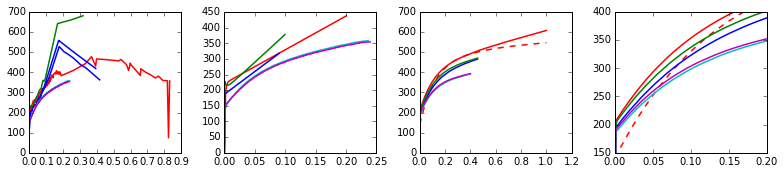

In [32]:
## check the validity of the data analyzed above (or obtained from VPSC/EVPSC)
fig=plt.figure(figsize=(11,2.5))
ax1=fig.add_subplot(141)
ax2=fig.add_subplot(142)
ax3=fig.add_subplot(143)
ax4=fig.add_subplot(144)

## necessary data
cs=['r','b','b','g','c','m']
fc_n=[fc_BB_comb,fc_psrd,fc_psrd1,fc_pstd,fc_urd,fc_utd]

for i in xrange(len(fc_n)):
    f=fc_n[i]
    ax1.plot(f.epsilon_vm,f.sigma_vm,'-',color=cs[i])


## FC_smoothed data
fc_s=[FC_smoothed_bb[0], FC_smoothed_psrd[0], FC_smoothed_pstd[0],fc_urd,fc_utd]
cs=['r','b','g','c','m']
for i in xrange(len(fc_s)):
    f=fc_s[i]
    ax2.plot(f.epsilon_vm,f.sigma_vm,cs[i])

## model data
css=['--r','-r','-b','-g','-c','-m']
fc_m=[fc_vpsc_bb,evpsc_bb,evpsc_psrd,evpsc_pstd,evpsc_urd,evpsc_utd]

for i in xrange(len(fc_m)):
    f=fc_m[i]
    f.get_eqv()
    ax3.plot(f.epsilon_vm,f.sigma_vm,css[i])
    
for i in xrange(len(fc_m)):
    f=fc_m[i]
    f.get_eqv()
    ax4.plot(f.epsilon_vm,f.sigma_vm,css[i])
    
ax4.set_xlim(0.,0.2)
ax4.set_ylim(150,400)

plt.tight_layout()


In [33]:
pwd

u'/Users/yj/repo/FLD_DIC_XRAY/tutorials'

In [34]:
## load pickled vpsc data
import cPickle as pickle

f_=open('vpsc_ome_IF', 'r')
vpsc_wcnt=pickle.load(f_)

nrot = len(vpsc_wcnt)
print 'nrot:',nrot
ncnt=len(wrk_levels)

print 'ncnt:',ncnt


inds=[53,61,67,73,80]

nrot: 48
ncnt: 7


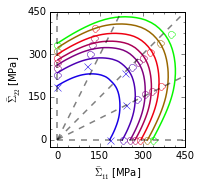

In [35]:
fig=plt.figure(figsize=(2.5,2.5))
ax=fig.add_subplot(111)

for i in xrange(len(wrk_levels)):
    for j in xrange(len(fcs)):
        s11,s22=wdat[:,i,j]
        sn=wdat[0,i,3]
        mrk='o'
        if i==0: mrk='x'
        #plot(s11/sn,s22/sn,m[i],mfc='None',mec=mc.to_rgba(wrk_levels[i]))
        ax.plot(s11,s22,mrk,mfc='None',mec=mc.to_rgba(wrk_levels[i]))

        
norm=mpl.colors.Normalize(0,60)
cmap, mc = mpl_lib.norm_cmap(mn=0,mx=60,cm_name='brg')


k=0
dat=np.zeros((2,len(wrk_levels),nrot))
for i in xrange(len(wrk_levels)):
    for j in xrange(nrot):
        _fc_=vpsc_wcnt[j]
        s11=_fc_.sigma[0,0]
        s22=_fc_.sigma[1,1]

        _s11_=interp(wrk_levels[i],_fc_.w,s11)
        _s22_=interp(wrk_levels[i],_fc_.w,s22)

        dat[0,i,j]=_s11_; dat[1,i,j]=_s22_
        if j in inds and i==0:#,27]:
            #plot(_fc_.sigma[0,0],
            #         _fc_.sigma[1,1])#,c[k])
            k=k+1
        else:pass #ax1.plot(_s11_,_s22_,'x')
        
for i in xrange(ncnt):
    c=mc.to_rgba(wrk_levels[i])
    ax.plot(dat[0,i,:],dat[1,i,:],'-',color=c)        

ax.set_xlim(-25.,450)
ax.set_ylim(-25.,450)

ax.set_aspect('equal')

ax.set_ylabel(r'$\bar{\Sigma}_{22}$ [MPa]')
ax.set_xlabel(r'$\bar{\Sigma}_{11}$ [MPa]')

fld_pp.draw_guide(ax,r_line=[0,0.5,1,1.5,2],max_r=1000)

for ax in fig.axes:    
    ax.xaxis.set_major_locator(MaxNLocator(nbins=4))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
    ax.minorticks_on()
    
fig.savefig('xray_vpsc.pdf',bbox_inches='tight')
    

## Pickle smoothed Flow Stress Curve objects

In [36]:
fcs=[FC_smoothed_bb[0],FC_smoothed_psrd[0],FC_smoothed_pstd[0],fc_urd,fc_utd]
with open('FC_smoothed_exp','w') as f:
    pickle.dump( fcs, f)

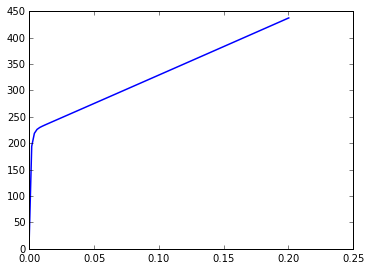

In [37]:
test_=pickle.load(open('FC_smoothed_exp','rb'))
_fc_=test_[0]
plot(_fc_.epsilon_vm,_fc_.sigma_vm)